Benchmark All models

In [2]:
from coconut_inference import coconut_inference
import time


def test_time(coconut):
    start = time.time()
    rs = coconut.inference(image_path=test_image_path, num_of_perdict=5)
    end = time.time()
    print('inference took %.4fs' % (end - start))
    
nsfw_models = {}
# NSFW Model File Path
# v1
nsfw_models['nsfw_mobilenet'] = coconut_inference(model_checkpoint_file_path='checkpoints/nsfw_mobilenet_sgd.pth_best.pth')
nsfw_models['nsfw_resnet50_sgd'] = coconut_inference(model_checkpoint_file_path='checkpoints/nsfw_resnet50_sgd.pth_best.pth')
nsfw_models['nsfw_resnet101_sgd'] = coconut_inference(model_checkpoint_file_path='checkpoints/nsfw_resnet101_sgd.pth_best.pth')
nsfw_models['nsfw_resnet101_adabound'] = coconut_inference(model_checkpoint_file_path='checkpoints/nsfw_resnet101_adabound.pth_best.pth')
# v2
nsfw_models['nsfw_resnet101_sgd_v2'] = coconut_inference(model_checkpoint_file_path='checkpoints/nsfw_resnet101_sgd_v2.pth_best.pth')
# v3
nsfw_models['nsfw_resnet101_sgd_v3'] = coconut_inference(model_checkpoint_file_path='checkpoints/nsfw_resnet101_sgd_v3.pth_best.pth')

food179_models = {}
# Food179 Model File Path
# v1
food179_models['food179_mobilenet_sgd'] = coconut_inference(model_checkpoint_file_path='checkpoints/food179_mobilenet_sgd.pth_best.pth')
food179_models['food179_resnet50_sgd'] = coconut_inference(model_checkpoint_file_path='checkpoints/food179_resnet50_sgd.pth_best.pth')
food179_models['food179_resnet101_sgd'] = coconut_inference(model_checkpoint_file_path='checkpoints/food179_resnet101_sgd.pth_best.pth')
food179_models['food179_resnet101_adabound'] = coconut_inference(model_checkpoint_file_path='checkpoints/food179_resnet101_adabound.pth_best.pth')
# v3
food179_models['food179_resnet101_sgd_v3'] = coconut_inference(model_checkpoint_file_path='checkpoints/food179_resnet101_sgd_v3.pth_best.pth')

test_image_path = '/Users/hanxunhuang/Desktop/UniMelb/2019-semester1/COMP90024-Cluster-and-Cloud-Computing/project/project2/COMP90024-2019S1-Team7/machine_learning/GalGadot_Fast7.jpg'

print('=' * 20 + 'NSFW' + '=' * 20)
for key in nsfw_models:
    print(key)
    test_time(nsfw_models[key])
    print(nsfw_models[key].print_model_details())

print('=' * 20 + 'FOOD179' + '=' * 20)
for key in food179_models:
    print(key)
    test_time(food179_models[key])
    print(food179_models[key].print_model_details())

building MobileNetV2
building resnet50
building resnet101
building resnet101
building resnet101
building resnet101
building MobileNetV2
building resnet50
building resnet101
building resnet101
building resnet101
====================NSFW====================
nsfw_mobilenet
inference took 0.1623s
model_arc: mobilenet
model_type: nsfw
train_optimizer: sgd
test_acc: 0.8760	best_acc: 0.8760	test_acc_top5: 1.0000

nsfw_resnet50_sgd
inference took 0.3231s
model_arc: resnet50
model_type: nsfw
train_optimizer: sgd
test_acc: 0.8759	best_acc: 0.8759	test_acc_top5: 1.0000

nsfw_resnet101_sgd
inference took 0.4963s
model_arc: resnet101
model_type: nsfw
train_optimizer: sgd
test_acc: 0.8823	best_acc: 0.8823	test_acc_top5: 1.0000

nsfw_resnet101_adabound
inference took 0.5212s
model_arc: resnet101
model_type: nsfw
train_optimizer: adabound
test_acc: 0.8774	best_acc: 0.8774	test_acc_top5: 1.0000

nsfw_resnet101_sgd_v2
inference took 0.4854s
model_arc: resnet101
model_type: nsfw
train_optimizer: sgd
test

Plot Training Acc Graph

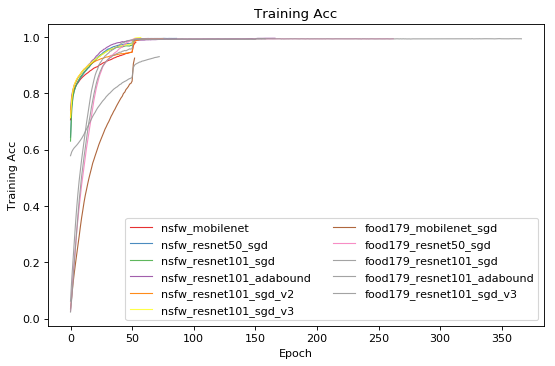

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

draw_key = 'train_acc'
palette = plt.get_cmap('Set1')
color_index = 0
fig = plt.figure(figsize=(8, 5), dpi= 80, facecolor='w', edgecolor='k')

for key in nsfw_models:
    train_history_dict = nsfw_models[key].get_checkpoint_train_dict()
    draw_list = []
    for index in range(len(train_history_dict)):
        draw_list.append(train_history_dict[index][draw_key])
    plt.plot(draw_list, color=palette(color_index), linewidth=1, alpha=0.9, label=key)
    color_index = color_index + 1
    
for key in food179_models:
    train_history_dict = food179_models[key].get_checkpoint_train_dict()
    draw_list = []
    for index in range(len(train_history_dict)):
        draw_list.append(train_history_dict[index][draw_key])
    plt.plot(draw_list, color=palette(color_index), linewidth=1, alpha=0.9, label=key)
    color_index = color_index + 1

plt.title('Training Acc')
plt.ylabel('Training Acc')
plt.xlabel('Epoch') 
plt.legend(loc=0, ncol=2)
plt.show()    

Plot Train Loss Graph

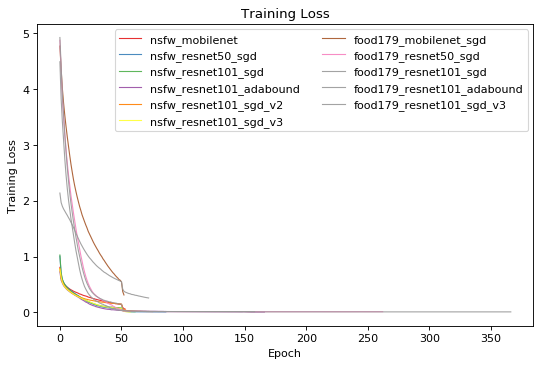

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

draw_key = 'train_loss'
palette = plt.get_cmap('Set1')
color_index = 0
fig = plt.figure(figsize=(8, 5), dpi= 80, facecolor='w', edgecolor='k')

for key in nsfw_models:
    train_history_dict = nsfw_models[key].get_checkpoint_train_dict()
    draw_list = []
    for index in range(len(train_history_dict)):
        draw_list.append(train_history_dict[index][draw_key])
    plt.plot(draw_list, color=palette(color_index), linewidth=1, alpha=0.9, label=key)
    color_index = color_index + 1
    
for key in food179_models:
    train_history_dict = food179_models[key].get_checkpoint_train_dict()
    draw_list = []
    for index in range(len(train_history_dict)):
        draw_list.append(train_history_dict[index][draw_key])
    plt.plot(draw_list, color=palette(color_index), linewidth=1, alpha=0.9, label=key)
    color_index = color_index + 1

plt.title('Training Loss')
plt.ylabel('Training Loss')
plt.xlabel('Epoch') 
plt.legend(loc=0, ncol=2)
plt.show()    

Plot Eval Acc Graph

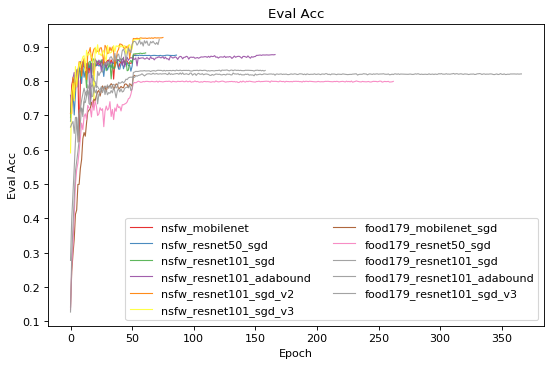

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

draw_key = 'test_acc'
palette = plt.get_cmap('Set1')
color_index = 0
fig = plt.figure(figsize=(8, 5), dpi= 80, facecolor='w', edgecolor='k')

for key in nsfw_models:
    train_history_dict = nsfw_models[key].get_checkpoint_train_dict()
    draw_list = []
    for index in range(len(train_history_dict)):
        draw_list.append(train_history_dict[index][draw_key])
    plt.plot(draw_list, color=palette(color_index), linewidth=1, alpha=0.9, label=key)
    color_index = color_index + 1
    
draw_key = 'test_acc_top5'
for key in food179_models:
    train_history_dict = food179_models[key].get_checkpoint_train_dict()
    draw_list = []
    for index in range(len(train_history_dict)):
        draw_list.append(train_history_dict[index][draw_key])
    plt.plot(draw_list, color=palette(color_index), linewidth=1, alpha=0.9, label=key)
    color_index = color_index + 1

plt.title('Eval Acc')
plt.ylabel('Eval Acc')
plt.xlabel('Epoch') 
plt.legend(loc=0, ncol=2)
plt.show()    

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

test_image_path = '/Users/hanxunhuang/Desktop/UniMelb/2019-semester1/COMP90024-Cluster-and-Cloud-Computing/project/project2/COMP90024-2019S1-Team7/machine_learning/GalGadot_Fast7.jpg'

# Show Image
img = mpimg.imread(test_image_path)
plt.imshow(img)
print(nsfw_models['nsfw_resnet101_sgd_v3'].inference(image_path=test_image_path, num_of_perdict=5))
print(food179_models['food179_resnet101_sgd_v3'].inference(image_path=test_image_path, num_of_perdict=5))


Benchmark on Real Tweets

In [ ]:
import json
normal_tweets_json_file_path = '/Users/hanxunhuang/Desktop/UniMelb/2019-semester1/COMP90024-Cluster-and-Cloud-Computing/project/project2/twitter_data.json'
nsfw_tweets_json_file_path = '/Users/hanxunhuang/Desktop/UniMelb/2019-semester1/COMP90024-Cluster-and-Cloud-Computing/project/project2/GOLDFINGERS_AUS.json'

def nsfw_compare_func(rs):
    if (rs[0][0] == 'porn' or rs[0][0] == 'sexy') and rs[0][1] > 0.7:
        return True
    return False

def food_179_compare_func(rs):
    if rs[0][0] == 'non_food' and rs[0][1] > 0.7:
        return True
    return False

def benchmark_nsfw_tweets(path_file, model, compare_func):
    all_rs_list = []
    selected_rs_list = []
    with open(path_file, 'r') as json_file:
        data = json.load(json_file)
        for tweet_data in data['tweets']:
            for image_url in tweet_data['image_urls']:
                try:
                    rs = model.inference(image_path=image_url, is_url_image=True, num_of_perdict=5)
                    all_rs_list.append((tweet_data['id'], rs))
                    is_select = compare_func(rs)
                    if is_select:
                        selected_rs_list.append((tweet_data['id'], rs))
                except:
                    continue
                    
    all_rs_list_count = len(all_rs_list)
    selected_rs_list_count = len(selected_rs_list)
    ratio = selected_rs_list_count / all_rs_list_count
    return (all_rs_list_count, selected_rs_list_count, ratio)


def benchmark_normal_tweets(path_file, model, compare_func):
    all_rs_list = []
    selected_rs_list = []
    with open(path_file) as json_file:  
        for line in json_file:
            data = json.loads(line[:-2])
            if 'entities' in data and 'media' in data['entities'] :
                for media_data in data['entities']['media']:
                    try:
                        rs = model.inference(image_path=media_data['media_url'], is_url_image=True, num_of_perdict=5)
                        all_rs_list.append((data['id'], rs))
                        if compare_func(rs):
                            selected_rs_list.append((data['id'], rs))
                    except:
                        continue

    all_rs_list_count = len(all_rs_list)
    selected_rs_list_count = len(selected_rs_list)
    ratio = selected_rs_list_count / all_rs_list_count
    return (all_rs_list_count, selected_rs_list_count, ratio)

def benchmark_model(model, compare_func):
    print('-'*20+'Normal Tweets'+'-'*20)
    all_count, select_count, ratio = benchmark_normal_tweets(normal_tweets_json_file_path, model, compare_func)
    print('Tweet count: %d\nSelected count: %d\nratio: %.4f' % (all_count, select_count, ratio))
    
    print('-'*20+'NSFW Tweets'+'-'*20)
    all_count, select_count, ratio = benchmark_nsfw_tweets(nsfw_tweets_json_file_path, model, compare_func)
    print('Tweet count: %d\nSelected count: %d\nratio: %.4f' % (all_count, select_count, ratio))


In [ ]:
# Benchmark NSFW V1 V2 V3
# V1
print('-'*20+'nsfw_resnet101_sgd'+'-'*20)
benchmark_model(nsfw_models['nsfw_resnet101_sgd'], nsfw_compare_func)
# V2
print('-'*20+'nsfw_resnet101_sgd_v2'+'-'*20)
benchmark_model(nsfw_models['nsfw_resnet101_sgd_v2'], nsfw_compare_func)
# V3
print('-'*20+'nsfw_resnet101_sgd_v3'+'-'*20)
benchmark_model(nsfw_models['nsfw_resnet101_sgd_v3'], nsfw_compare_func)


In [ ]:
# Benchmark FOOD179 V1 V3
# V1
print('-'*20+'food179_resnet101_sgd'+'-'*20)
benchmark_model(food179_models['food179_resnet101_sgd'], food_179_compare_func)

# V3
print('-'*20+'food179_resnet101_sgd_v3'+'-'*20)
benchmark_model(food179_models['food179_resnet101_sgd_v3'], food_179_compare_func)